# Load and install necessary modules for spatial analysis.

In [ ]:
pip install geojson

In [ ]:
import geojson

In [ ]:
# Two images and their paths
ifile = r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif'
ifile = r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif'

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.7 MB/s eta 0:00:00


In [ ]:
import rasterio
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Data and check GeoTIFF specifications

In [ ]:
# Path to the GeoTIFF file
geotiff_path = ifile

# Open the GeoTIFF using rasterio
with rasterio.open(geotiff_path) as dataset:
    # Read the raster data (all bands)
    raster_data = dataset.read()

    # Get the spatial transformation (georeferencing information)
    transform = dataset.transform

    # Get the number of bands in the raster
    num_bands = dataset.count

    # Get the CRS (coordinate reference system) information
    crs = dataset.crs

# Print information about the loaded GeoTIFF
print("Number of Bands:", num_bands)
print("Raster Shape (rows, columns, bands):", raster_data.shape)
print("CRS:", crs)
print("Transform:", transform)

Number of Bands: 8
Raster Shape (rows, columns, bands): (8, 8603, 12115)
CRS: EPSG:32756
Transform: | 3.00, 0.00, 471987.00|
| 0.00,-3.00, 6968517.00|
| 0.00, 0.00, 1.00|


In [ ]:
raster_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.mean(raster_data, axis=(1, 2))/10000   # band means converted to reflectance

array([0.02676511, 0.03240637, 0.04045107, 0.04466795, 0.04543498,
       0.04425468, 0.0670666 , 0.16458501])

In [ ]:
raster_data.mean()

582.0397096023045

In [ ]:
"""" we have 3 images, therefore we need a way of determining when our ROIs are within the bbox of each image
> loop over the list of ROI coords and determine which image to load
>> determine if ROI within image bbox

Can we read in the image extent without the image data? """

# Open the GeoTIFF using rasterio
with rasterio.open(geotiff_path) as dataset:
  # Get the extent (bounding box) of the image
  image_extent = dataset.bounds

  # # Check if the ROI bounding box is within the image extent
  # roi_within_image = (roi_bounding_box[0] >= image_extent[0] and
  #                     roi_bounding_box[1] >= image_extent[1] and
  #                     roi_bounding_box[2] <= image_extent[2] and
  #                     roi_bounding_box[3] <= image_extent[3])

  # # Print the result
  # if roi_within_image:
  #     print("ROI is within the image bounds.")
  # else:
  #     print("ROI is not within the image bounds.")

In [ ]:
image_extent  # in local CRS

BoundingBox(left=471987.0, bottom=6942708.0, right=508332.0, top=6968517.0)

In [ ]:
raster_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
transform

Affine(3.0, 0.0, 471987.0,
       0.0, -3.0, 6968517.0)

In [ ]:
np.shape(raster_data)

(8, 8603, 12115)

In [ ]:
raster_data[0,:,:].max()

19364

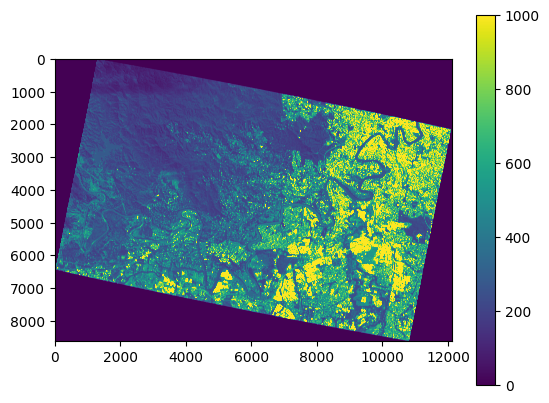

In [ ]:
# image quickplot of band 1
# confirmed data for all three images is good (i.e. only zeroes outside of the image boundary)
plt.imshow(raster_data[1,:,:],vmax=1000)
plt.colorbar()

Extract data from predefined bounding boxes

In [ ]:
# Coordinates of the desired bounding box in the format (minx, miny, maxx, maxy)
# note the below bbox coords are valid for the smallest image of the three

#desired_bounding_box = (lon_min, lat_min, lon_max, lat_max)
lon_min, lat_min, lon_max, lat_max = 153.1526454, -27.53957472, 153.1531504, -27.53939472
#515071.79912966565 6953790.311239585 515121.6861906159 6953790.311239585 515121.6861906159 6953810.187951414 515071.79912966565 6953810.187951414 515071.79912966565 6953790.311239585

lon_min, lat_min, lon_max, lat_max = 515071.79912966565, 6953790.311239585, 515121.6861906159, 6953810.187951414    # figured out the window extraction needs the coords in the native CRS [EPSG:32756]

desired_bounding_box = (lon_min, lat_min, lon_max, lat_max)   # equivalent to Xmin, Ymin, Xmax, Ymax (in Eastings and Northings)


# Open the GeoTIFF using rasterio
with rasterio.open(geotiff_path) as dataset:
    # Get the window for the desired bounding box
    window = dataset.window(*desired_bounding_box)

    # Read the raster data within the specified window
    raster_data = dataset.read(window=window)

    # Get the spatial transformation (georeferencing information) for the window
    window_transform = dataset.window_transform(window)

# Print information about the extracted data
print("Extracted Raster Shape (rows, columns, bands):", raster_data.shape)
print("Window Transform:", window_transform)

Extracted Raster Shape (rows, columns, bands): (8, 7, 0)
Window Transform: | 3.00, 0.00, 515071.80|
| 0.00,-3.00, 6953810.19|
| 0.00, 0.00, 1.00|


In [ ]:
import geojson

In [ ]:
import pyproj

In [ ]:
""" required to convert lat long to local image coord system """
# Define the input coordinate system (WGS 84, which is common for GPS coordinates)
input_crs = pyproj.CRS("EPSG:4326")

# Define the output UTM coordinate system (e.g., UTM Zone 33N with WGS 84 datum)
output_crs = pyproj.CRS("EPSG:32756")  # UTM Zone 33N   # 32756  https://epsg.io/32756  #20356    #7856

# Create a pyproj Transformer for the conversion
transformer = pyproj.Transformer.from_crs(input_crs, output_crs, always_xy=True)


In [ ]:
# List of central latitude and longitude coordinates for the field sites
field_sites = [
    (-27.49415846, 152.7408134),  # Field site 1
    (-27.4996146, 152.7388185),  # Field site 2
    (-27.50965686, 152.7975522),  # Field site 3
    (-27.52625347, 152.864255),  # Field site 4
    (-27.52778734, 152.8633343),  # Field site 5
    (-27.53948472, 153.1528979),  # Field site 6
    (-27.53771376, 153.1447333),  # Field site 7
    (-27.52950791, 153.1448171),  # Field site 8
    (-27.55665257, 152.8541602),  # Field site 9
    (-27.55483345, 152.8511169), # Field site 10
    (-27.55482989, 152.8551187),  # Field site 11
    (-27.57918881, 153.1671666),  # Field site 12
]

# Set the buffer to load around the central coordinates, 50m by 20m.
buffer_lat = 0.000180
buffer_lon = 0.000505

# Loop through code to convert Field sites from Latitude/Longitude to Eastings and Northings

In [ ]:
""" loop to covert all ROI lat longs to Eastings and Northings """
for site_idx, (central_lat, central_lon) in enumerate(field_sites):
    # if site_idx < 2:
        site_name = 'site_'+str(site_idx)
        print(site_name)

        lat_range = (central_lat - buffer_lat/2, central_lat + buffer_lat/2)
        lon_range = (central_lon - buffer_lon/2, central_lon + buffer_lon/2)

        # Convert coordinates
        utm_easting1, utm_northing1 = transformer.transform(lon_range[0], lat_range[0])
        utm_easting2, utm_northing2 = transformer.transform(lon_range[1], lat_range[1])

        print(lat_range,lon_range)

        print(utm_easting1,utm_northing1, utm_easting2,utm_northing1, utm_easting2, utm_northing2, utm_easting1,utm_northing2, utm_easting1,utm_northing1)

site_0
(-27.49424846, -27.49406846) (152.74056090000002, 152.7410659)
474373.1396940462 6958793.479503897 474422.98115276534 6958793.479503897 474422.98115276534 6958813.521860968 474373.1396940462 6958813.521860968 474373.1396940462 6958793.479503897
site_1
(-27.4997046, -27.4995246) (152.73856600000002, 152.739071)
474177.3600089082 6958188.701751143 474227.1986845086 6958188.701751143 474227.1986845086 6958208.744941512 474177.3600089082 6958208.744941512 474177.3600089082 6958188.701751143
site_2
(-27.50974686, -27.50956686) (152.79729970000002, 152.7978047)
479980.5015580247 6957087.194643834 480030.3450128216 6957087.194643834 480030.3450128216 6957107.214224558 479980.5015580247 6957107.214224558 479980.5015580247 6957087.194643834
site_3
(-27.52634347, -27.52616347) (152.86400250000003, 152.8645075)
486570.36386002146 6955257.822312279 486620.2104388763 6955257.822312279 486620.2104388763 6955277.815102797 486570.36386002146 6955277.815102797 486570.36386002146 6955257.82231227

In [ ]:
""" extract data from predefined polygon - Test case """

#roi_polygon = geojson.Polygon([[(lon1, lat1), (lon2, lat2), (lon3, lat3), (lon4, lat4), (lon1, lat1)]])

roi_polygon = geojson.Polygon([[(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]])

In [ ]:
from shapely.geometry import shape
import shapely

In [ ]:
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]
roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})
roi_coordinates

[(516474.7268775898, 6949390.538959475),
 (516524.59835553356, 6949390.538959475),
 (516524.59835553356, 6949410.409986593),
 (516474.7268775898, 6949410.409986593),
 (516474.7268775898, 6949390.538959475)]

In [ ]:
""" loop over images to determine if ROI within image extent """

im_list = [r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif',
           r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif',]

In [ ]:
import shapely.geometry as shp

# Extract ROI Geometry by creating loop of roi_coordinates_list and GeoTIFF Path. Code works out which ROI Intersects which GeoTIFF and then extracts data based on this condition.




In [ ]:
# Define a list of different roi_coordinates
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]

roi_coordinates_list = [
    [(474373.1396940462, 6958793.479503897), (474422.98115276534, 6958793.479503897), (474422.98115276534, 6958813.521860968), (474373.1396940462, 6958813.521860968), (474373.1396940462, 6958793.479503897)],  #site 1
    [(474177.3600089082, 6958188.701751143), (474227.1986845086, 6958188.701751143), (474227.1986845086, 6958208.744941512), (474177.3600089082, 6958208.744941512), (474177.3600089082, 6958188.701751143)],  #site 2
    [(479980.5015580247, 6957087.194643834), (480030.3450128216, 6957087.194643834), (480030.3450128216, 6957107.214224558), (479980.5015580247, 6957107.214224558), (479980.5015580247, 6957087.194643834)],  #site 3
    [(486570.36386002146, 6955257.822312279), (486620.2104388763, 6955257.822312279), (486620.2104388763, 6955277.815102797), (486570.36386002146, 6955277.815102797), (486570.36386002146, 6955257.822312279)],  #site 4
    [(486479.6330743453, 6955087.818947073), (486529.4788129839, 6955087.818947073), (486529.4788129839, 6955107.81211484), (486479.6330743453, 6955107.81211484), (486479.6330743453, 6955087.818947073)],  #site 5
    [(515071.79912966565, 6953790.311239585), (515121.6861906159, 6953790.311239585), (515121.6861906159, 6953810.187951414), (515071.79912966565, 6953810.187951414), (515071.79912966565, 6953790.311239585)],  #site 6
    [(514265.8760246999, 6953987.443283137), (514315.76255935855, 6953987.443283137), (514315.76255935855, 6954007.3232734185), (514265.8760246999, 6954007.3232734185), (514265.8760246999, 6953987.443283137)],  #site 7
    [(514275.21052023943, 6954896.378012182), (514325.100765495, 6954896.378012182), (514325.100765495, 6954916.257956941), (514275.21052023943, 6954916.257956941), (514275.21052023943, 6954896.378012182)],  #site 8
    [(485577.4798407507, 6951889.441260086), (485627.31106133614, 6951889.441260086), (485627.31106133614, 6951909.438246933), (485577.4798407507, 6951909.438246933), (485577.4798407507, 6951889.441260086)],  #site 9
    [(485276.7962368901, 6952090.5838473365), (485326.6277945362, 6952090.5838473365), (485326.6277945362, 6952110.58205295), (485276.7962368901, 6952110.58205295), (485276.7962368901, 6952090.5838473365)],  #site 10
    [(485671.8683827403 , 6952091.447508252), (485721.70058106194, 6952091.447508252), (485721.70058106194, 6952111.444100948), (485671.8683827403, 6952111.444100948), (485671.8683827403, 6952091.447508252)],  #site 11
    [(516474.7268775898, 6949390.538959475), (516524.59835553356, 6949390.538959475), (516524.59835553356, 6949410.409986593), (516474.7268775898, 6949410.409986593), (516474.7268775898, 6949390.538959475)],  #site 12
    # Add more ROI coordinates as needed
]

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    print(geotiff_path)
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

    # Iterate over different ROI coordinates
    for roi_coordinates in roi_coordinates_list:
        roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

        # Check if the current ROI polygon intersects with the image extent
        roi_within_image = roi_polygon.intersects(im_polygon)

        # Print the result
        if roi_within_image:
            print("study site intersects with the GeoTIFF extent.")
        else:
            print("study site does not intersect with the GeoTIFF extent.")

/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the 

In [ ]:
import rasterio.mask
from rasterio.mask import mask

In [ ]:
im_list = [r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif',
           r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif',]


roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]

roi_coordinates_list = [
    [(474373.1396940462, 6958793.479503897), (474422.98115276534, 6958793.479503897), (474422.98115276534, 6958813.521860968), (474373.1396940462, 6958813.521860968), (474373.1396940462, 6958793.479503897)],  #site 1
    [(474177.3600089082, 6958188.701751143), (474227.1986845086, 6958188.701751143), (474227.1986845086, 6958208.744941512), (474177.3600089082, 6958208.744941512), (474177.3600089082, 6958188.701751143)],  #site 2
    [(479980.5015580247, 6957087.194643834), (480030.3450128216, 6957087.194643834), (480030.3450128216, 6957107.214224558), (479980.5015580247, 6957107.214224558), (479980.5015580247, 6957087.194643834)],  #site 3
    [(486570.36386002146, 6955257.822312279), (486620.2104388763, 6955257.822312279), (486620.2104388763, 6955277.815102797), (486570.36386002146, 6955277.815102797), (486570.36386002146, 6955257.822312279)],  #site 4
    [(486479.6330743453, 6955087.818947073), (486529.4788129839, 6955087.818947073), (486529.4788129839, 6955107.81211484), (486479.6330743453, 6955107.81211484), (486479.6330743453, 6955087.818947073)],  #site 5
    [(515071.79912966565, 6953790.311239585), (515121.6861906159, 6953790.311239585), (515121.6861906159, 6953810.187951414), (515071.79912966565, 6953810.187951414), (515071.79912966565, 6953790.311239585)],  #site 6
    [(514265.8760246999, 6953987.443283137), (514315.76255935855, 6953987.443283137), (514315.76255935855, 6954007.3232734185), (514265.8760246999, 6954007.3232734185), (514265.8760246999, 6953987.443283137)],  #site 7
    [(514275.21052023943, 6954896.378012182), (514325.100765495, 6954896.378012182), (514325.100765495, 6954916.257956941), (514275.21052023943, 6954916.257956941), (514275.21052023943, 6954896.378012182)],  #site 8
    [(485577.4798407507, 6951889.441260086), (485627.31106133614, 6951889.441260086), (485627.31106133614, 6951909.438246933), (485577.4798407507, 6951909.438246933), (485577.4798407507, 6951889.441260086)],  #site 9
    [(485276.7962368901, 6952090.5838473365), (485326.6277945362, 6952090.5838473365), (485326.6277945362, 6952110.58205295), (485276.7962368901, 6952110.58205295), (485276.7962368901, 6952090.5838473365)],  #site 10
    [(485671.8683827403 , 6952091.447508252), (485721.70058106194, 6952091.447508252), (485721.70058106194, 6952111.444100948), (485671.8683827403, 6952111.444100948), (485671.8683827403, 6952091.447508252)],  #site 11
    [(516474.7268775898, 6949390.538959475), (516524.59835553356, 6949390.538959475), (516524.59835553356, 6949410.409986593), (516474.7268775898, 6949410.409986593), (516474.7268775898, 6949390.538959475)],  #site 12
]

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates
        for roi_coordinates in roi_coordinates_list:
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

              #Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)
                    # You can now work with the extracted data in `masked_data`
                    # and the corresponding georeferencing transform in `masked_transform`

In [ ]:
# Print the masked data
print("Masked Data:", masked_data[6])

Masked Data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 578 607 592 598 626 628 614 601 579 610 620 592 603 644 668 672   0]
 [  0 591 617 599 575 616 621 607 593 614 613 621 598 571 626 664 669   0]
 [  0 624 621 598 579 608 604 629 633 627 582 614 651 656 634 633 642   0]
 [  0 584 632 614 579 573 613 654 662 623 585 648 649 654 656 631 627   0]
 [  0 587 667 658 592 572 624 632 668 672 661 711 663 653 688 710 682   0]
 [  0 664 631 602 611 588 592 569 602 652 690 721 683 670 656 658 672   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


# Calculate mean values for 8 spectral bands and loop over all 12 sites

In [ ]:
import numpy as np

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                # Calculate the mean for each band and each ROI
                mean_values = np.mean(masked_data, axis=(1, 2))
                print(f"array for site {site_num + 1}: {mean_values}")

array for site 6: [ 257.44444444  268.73809524  340.82539683  393.76984127  409.58730159
  318.6984127   692.91269841 2020.29365079]
array for site 7: [ 203.77083333  211.04166667  248.13888889  280.17361111  312.20138889
  278.59722222  541.39583333 1800.3125    ]
array for site 8: [ 279.39705882  312.70588235  379.88235294  433.92647059  477.31617647
  448.94852941  762.84558824 2052.08823529]
array for site 12: [ 375.38970588  420.47058824  511.50735294  594.72058824  689.58088235
  679.11764706 1037.09558824 2250.47058824]
array for site 1: [ 332.80882353  414.75735294  589.51470588  682.50735294  693.80147059
  706.19117647 1104.90441176 2551.16176471]
array for site 2: [ 211.73109244  246.40336134  350.61344538  398.13445378  400.76470588
  379.71428571  687.80672269 1946.1092437 ]
array for site 3: [ 138.86507937  181.16666667  250.78571429  282.96031746  269.27777778
  236.57936508  548.28571429 1986.13492063]
array for site 4: [ 169.55462185  230.61344538  311.05042017  356.34

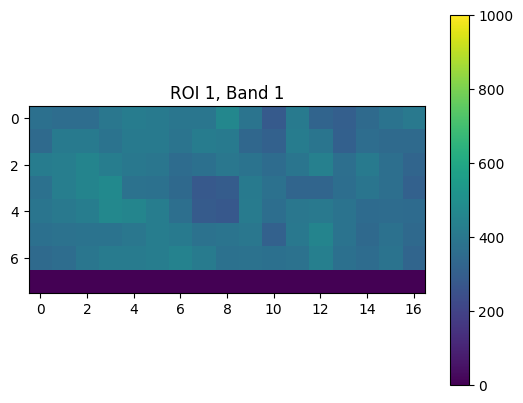

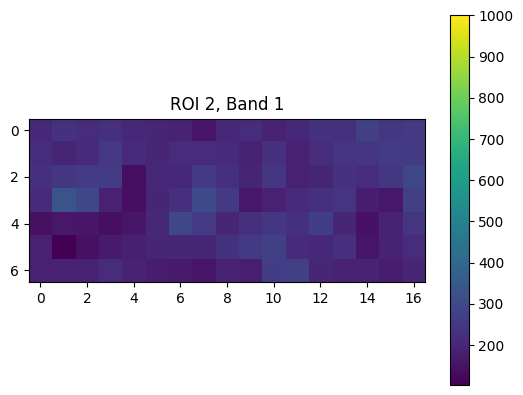

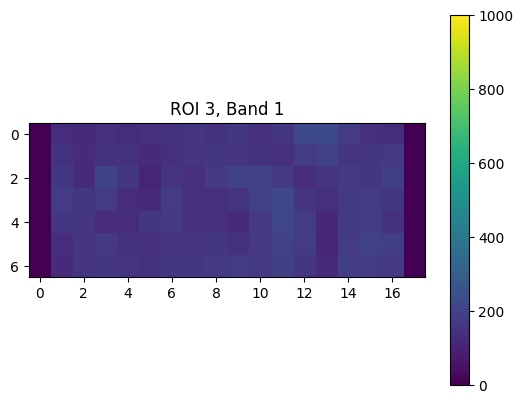

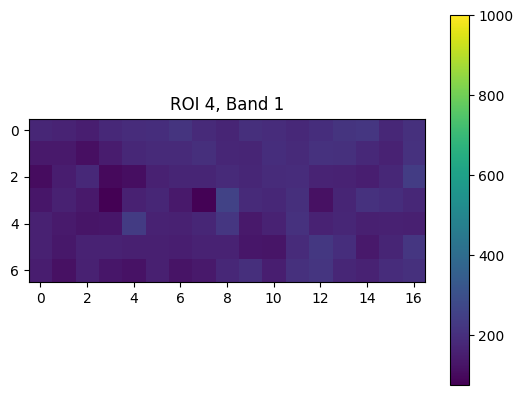

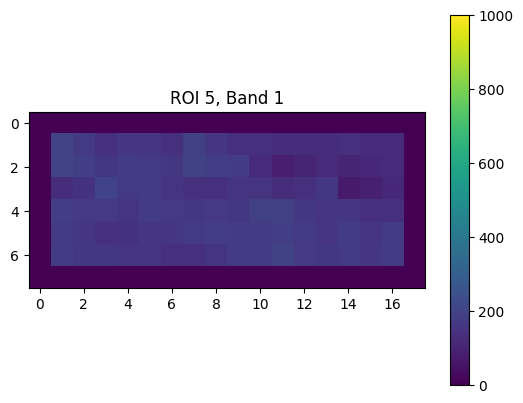

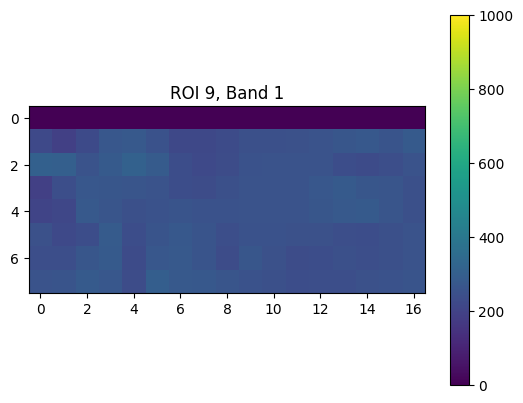

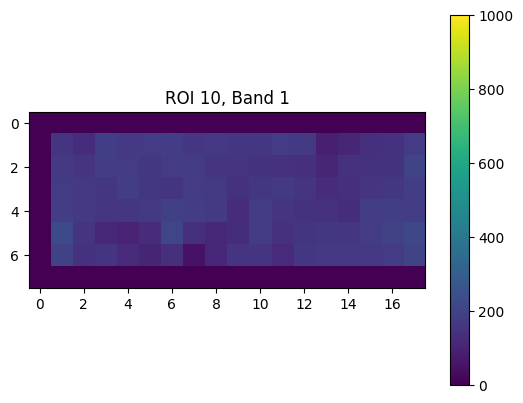

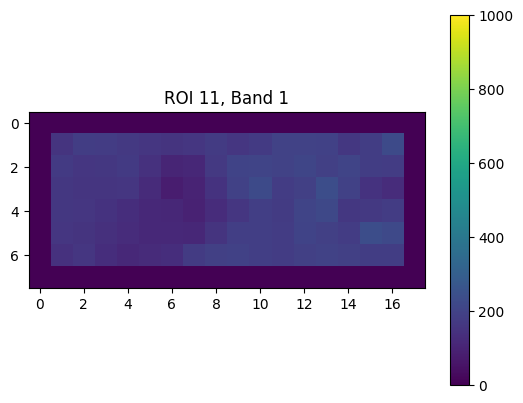

In [ ]:
# Iterate over different ROI coordinates
for site_num, roi_coordinates in enumerate(roi_coordinates_list):
    roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

    # Check if the current ROI polygon intersects with the image extent
    if roi_polygon.intersects(im_polygon):
        # Extract the ROI geometry
        with rasterio.open(geotiff_path) as roi_dataset:
            masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)


        # Plot the first band of masked_data2
        first_band_data_band_data = masked_data[0]
        plt.figure()
        plt.imshow(first_band_data_band_data, vmax=1000)
        plt.title(f'ROI {site_num + 1}, Band 1')
        plt.colorbar()
        plt.show()

In [ ]:
import numpy.ma as ma

# Calculate mean values for 8 spectral bands and loop over all 12 sites masking zero values

In [ ]:
# Create an empty list to store the spectral band means for each ROI
mu_list_ind = []
site_order = []  # Keep track of the site order

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                # Create a masked array by masking the zeros
                masked_data2 = ma.masked_equal(masked_data, 0)

                # Calculate the mean for each band and each ROI
                mean_values = np.mean(masked_data2, axis=(1, 2))

                # Append the mean values for the current ROI to mu_list_ind
                mu_list_ind.append(mean_values)
                site_order.append(site_num)  # Track the site order
                print(f"array for site {site_num + 1}: {mean_values}")

# Now, you can access the mean values for a specific site using site_order
# For example, to access the mean values for site 1:
site_1_mean_values = mu_list_ind[site_order.index(0)]

array for site 6: [289.625 302.33035714285717 383.42857142857144 442.99107142857144
 460.7857142857143 358.5357142857143 779.5267857142857 2272.8303571428573]
array for site 7: [287.6764705882353 297.94117647058823 350.3137254901961 395.53921568627453
 440.7549019607843 393.3137254901961 764.3235294117648 2541.6176470588234]
array for site 8: [372.52941176470586 416.94117647058823 506.5098039215686 578.5686274509804
 636.4215686274509 598.5980392156863 1017.1274509803922 2736.1176470588234]
array for site 12: [500.51960784313724 560.6274509803922 682.0098039215686 792.9607843137255
 919.4411764705883 905.4901960784314 1382.7941176470588 3000.627450980392]
array for site 1: [380.3529411764706 474.00840336134456 673.7310924369748 780.0084033613446
 792.9159663865546 807.0756302521008 1262.7478991596638 2915.6134453781515]
array for site 2: [ 211.73109244  246.40336134  350.61344538  398.13445378  400.76470588
  379.71428571  687.80672269 1946.1092437 ]
array for site 3: [156.223214285714

In [ ]:
mu_list_ind[site_order.index(0)]

masked_array(data=[380.3529411764706, 474.00840336134456,
                   673.7310924369748, 780.0084033613446,
                   792.9159663865546, 807.0756302521008,
                   1262.7478991596638, 2915.6134453781515],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20)

In [ ]:
# Create a masked array by masking the zeros
masked_data2 = ma.masked_equal(masked_data, 0)

In [ ]:
measurement_list = ["Coastal_Blue", "Blue", "Green_I", "Green",
                    "Yellow", "Red", "Red_Edge", "NIR"]


In [ ]:
import pandas as pd


# Create Dataframe for Random Forest Regression analysis later

In [ ]:
all_df = pd.DataFrame()
all_df = pd.DataFrame(index=measurement_list,data=mu_list_ind[site_order.index(0)]
                      ,columns=['Site1'])


In [ ]:
all_df


,Site1
Coastal_Blue,380.352941
Blue,474.008403
Green_I,673.731092
Green,780.008403
Yellow,792.915966
Red,807.075630
Red_Edge,1262.747899
NIR,2915.613445


In [ ]:

all_df = pd.DataFrame(index=measurement_list)  # Create an empty DataFrame with the index

# Iterate over sites and add columns to the DataFrame
for site_num in range(len(site_order)):
    site_name = f'Site_{site_num + 1}'  # Assuming you want column names like 'Site1', 'Site2', etc.
    site_mean_values = mu_list_ind[site_order.index(site_num)]
    all_df[site_name] = site_mean_values

# Now, 'all_df' will contain columns for each site with their respective mean values

all_df

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


# Calculate Enhanced Vegetation Index (EVI) for all regions of interest and calculate mean thereafter.

In [ ]:
import numpy as np
import rasterio
import rasterio.mask
from shapely.geometry import shape
import numpy.ma as ma

In [ ]:
def calculate_evi(red, nir, blue):

    # Constants for EVI calculation

    L = 1.0

    C1 = 6.0

    C2 = 7.5

    G = 2.5

    # Calculate EVI

    evi = G * ((nir/10000 - red/10000) / (nir/10000 + C1 * red/10000 - C2 * blue/10000 + L))



    return evi


In [ ]:
# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = rasterio.mask.mask(roi_dataset, [roi_polygon], crop=True)

                # Create masked arrays by masking the zeros for each band
                red_band = ma.masked_equal(masked_data[4], 0)  # Red Spectral Band for PlanetScope is Band 5
                nir_band = ma.masked_equal(masked_data[7], 0)  # NIR Spectral Band for PlanetScope is Band 8
                blue_band = ma.masked_equal(masked_data[1], 0) # Blue Spectral Band for PlanetScope is Band 2

                # Calculate EVI for the current ROI
                evi = calculate_evi(red_band, nir_band, blue_band)

                # Print or save the EVI values for the current ROI
                print(f"EVI values for ROI {site_num + 1}: {evi}")

EVI values for ROI 6: [[-- 0.3366691619715535 0.34261241970021417 0.357838654526659
  0.3633834822128193 0.35588415568495246 0.3628738845697216
  0.3604214277414106 0.3344330544754723 0.30852392475216617
  0.3119047619047619 0.3307227204479974 0.32711586851459834
  0.32801595214356927 0.32594986599400916 0.3356772470144562
  0.333425457991156 --]
 [-- 0.3642871346192086 0.34049405019047246 0.36138164898860453
  0.37562637018477923 0.35062713797035344 0.3551120100751822
  0.36593772739458463 0.3612416236617114 0.348582171392762
  0.33437561070940003 0.3350739773716275 0.3232868144325867
  0.3378297001083946 0.32731783442039136 0.3197182544367056
  0.3358297201418998 --]
 [-- 0.36558669001751315 0.34243614931237726 0.3675132526307461
  0.3812580733549928 0.3556549325383174 0.3291060452812573
  0.3403333720075801 0.35396354387452306 0.35267839648889066
  0.332795016726266 0.3180632289748312 0.3209486166007905
  0.3396165095872603 0.33010101010101 0.3264071331900326
  0.34324217201743956 -

In [ ]:
# Create an empty list to store EVI values per ROI
roi_evi_values = []

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = rasterio.mask.mask(roi_dataset, [roi_polygon], crop=True)

                # Create masked arrays by masking the zeros for each band
                red_band = ma.masked_equal(masked_data[4], 0)  # Red Spectral Band for PlanetScope is Band 5
                nir_band = ma.masked_equal(masked_data[7], 0)  # NIR Spectral Band for PlanetScope is Band 8
                blue_band = ma.masked_equal(masked_data[1], 0) # Blue Spectral Band for PlanetScope is Band 2

                # Calculate EVI for the current ROI
                evi = calculate_evi(red_band, nir_band, blue_band)

                # Append the EVI values for the current ROI to the list
                roi_evi_values.append(evi)

# Calculate the mean EVI values for each ROI
mean_evi_per_roi = [np.mean(evi_values) for evi_values in roi_evi_values]

# Print or save the mean EVI values for each ROI
for site_num, mean_evi in enumerate(mean_evi_per_roi):
    print(f"Mean EVI for Site {site_num + 1}: {mean_evi}")

Mean EVI for Site 1: 0.3544672424374853
Mean EVI for Site 2: 0.40545123618828816
Mean EVI for Site 3: 0.3907413509210647
Mean EVI for Site 4: 0.36351321583336604
Mean EVI for Site 5: 0.37585030042259204
Mean EVI for Site 6: 0.3089753417955565
Mean EVI for Site 7: 0.38545540534812395
Mean EVI for Site 8: 0.4393079787497134
Mean EVI for Site 9: 0.3004249613634639
Mean EVI for Site 10: 0.43084662720219497
Mean EVI for Site 11: 0.4278276223236455
Mean EVI for Site 12: 0.3727937989734402


In [ ]:
mean_evi_per_roi

[0.3544672424374853,
 0.40545123618828816,
 0.3907413509210647,
 0.36351321583336604,
 0.37585030042259204,
 0.3089753417955565,
 0.38545540534812395,
 0.4393079787497134,
 0.3004249613634639,
 0.43084662720219497,
 0.4278276223236455,
 0.3727937989734402]

In [ ]:
all_df

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
all_df_final = all_df.loc[~all_df.index.duplicated(keep='first')]

In [ ]:
all_df_final

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
# Create a new row with 'EVI' as the index and mean EVI values as the data
evi_row = pd.Series(mean_evi_per_roi, index=all_df.columns, name='EVI')

# Append the new row to the DataFrame
all_df_final = all_df.append(evi_row)


all_df_final

<ipython-input-53-48b84ee2f770>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df_final = all_df.append(evi_row)


,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451
EVI,0.354467,0.405451,0.390741,0.363513,0.375850,0.308975,0.385455,0.439308,0.300425,0.430847,0.427828,0.372794


In [ ]:
# Extract the 'EVI' row
evi_row = all_df_final.loc['EVI']

# Remove the 'EVI' row from its current position
df = all_df_final.drop('EVI')

# Reinsert the 'EVI' row at the first position
all_df_final2 = pd.concat([evi_row.to_frame().T, df])

# Display the updated DataFrame with 'EVI' at the first position
all_df_final2

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
EVI,0.354467,0.405451,0.390741,0.363513,0.375850,0.308975,0.385455,0.439308,0.300425,0.430847,0.427828,0.372794
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
all_df_final2

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
EVI,0.354467,0.405451,0.390741,0.363513,0.375850,0.308975,0.385455,0.439308,0.300425,0.430847,0.427828,0.372794
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
all_df_final2.T

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706


In [ ]:
""" export df """
all_df_final2.to_csv('P.SD_all_sites.csv')

In [ ]:
pwd

'/content'

# Load Excel spreadsheet into environment using openpyxl

In [ ]:
pip install openpyxl # required to open xlsx files

### Remember to upload Excel Spreadsheet ('Field Survey Data_FINAL' everytime you start a new session other wise following code won't work.

In [ ]:
""" load reference data """
ref_df = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet2')

In [ ]:
""" load reference data """
ref_df2 = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet1')

In [ ]:
ref_df

,Site #,Dataset (DS) Index for Python,Latitude (GDA2020),Longitude (GDA2020),Date,Remnant Status,Desktop RE,Groundtruthed RE,VHC,Vegetation Condition Class,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
0,1,0,27.494158,152.740813,2022-09-07,nonremnant (cleared),Nonremnant,Nonremnant,39.b,7,...,NaN,NaN,0,"Dominated by managed non native grass, cleared...",Poaceae Unknown,100.0,100.0,1.0,"Dominated by managed non native grass, cleared...",NaN
1,2,1,27.499615,152.738818,2022-09-07,regrowth,12.11.6,Regrowth 12.11.6,10.2,3,...,0.0,NaN,11,Dominated by exotic species such as Melinis re...,"Ageratum houstonianum (exotic),Bidens pilosa (...",100.0,99.0,36.0,Regrowth on the edge of a cleared patch and un...,NaN
2,3,2,27.509657,152.797552,2022-09-07,remnant,12.11.3a,12.11.3a,9.2,1,...,0.0,NaN,14,Dominated by lantana montevensis with billy go...,NaN,99.0,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
3,4,3,27.526253,152.864255,2022-08-31,remnant,12.11.5,12.11.5,10.1,1,...,0.0,NaN,10,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9.0,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
4,5,4,27.527787,152.863334,2022-08-31,remnant,12.11.3,12.11.5,10.1,1,...,0.0,NaN,23,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8.0,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
5,6,5,27.539485,153.152898,2022-08-30,remnant,12.910.22,12.910.22,22.5,1,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
6,7,6,27.537714,153.144733,2022-08-30,remnant,12.910.4,12.910.4,9.2,2,...,0.0,NaN,14,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21.0,56.0,9.0,NaN,Platylobium formosum
7,8,7,27.529508,153.144817,2022-08-30,nonremnant (cleared),Nonremnant,Nonremnant,39.a,3,...,0.0,NaN,4,NaN,"Eragrostis sp.,Festuca sp.,Gahnia sp.,Lomandra...",21.4,19.0,25.0,Transect is upslope,Entolasia stricta
8,9,8,27.556653,152.854160,2022-08-31,nonremnant (cleared),Non remnant,Non remnant,39.a,6,...,0.0,NaN,0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex...",3.4,58.0,5.0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex..."
9,10,9,27.554833,152.851117,2022-08-31,regrowth,12.3.3,Rehabilitated 12.3.7/12.3.3,16.1,4,...,0.0,NaN,9,NaN,"Cardiospermum grandiflorum (exotic),Commelina ...",13.0,77.0,7.0,NaN,"Asparagus africanus (exotic),Lantana camara (e..."


In [ ]:
filtered_df = ref_df2[(ref_df2['Remnant Status'] == 'remnant') & (ref_df2['EDL'] != 'Water')]   # filter the df for an auto loop

In [ ]:
""" specify reponse variable """

resp_var1 = pd.to_numeric(ref_df["Litter Depth Average (mm)"].values)

In [ ]:
resp_var1

array([ 1. , 36. , 24. ,  9. , 13. ,  9.2,  9. , 25. ,  5. ,  7. ,  9.4,
        1.6])

In [ ]:
""" swap rows and cols in all_df """

all_df_pred = all_df_final2.T

all_df_pred

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706


Text(0.5, 1.0, 'Scatter Plot')

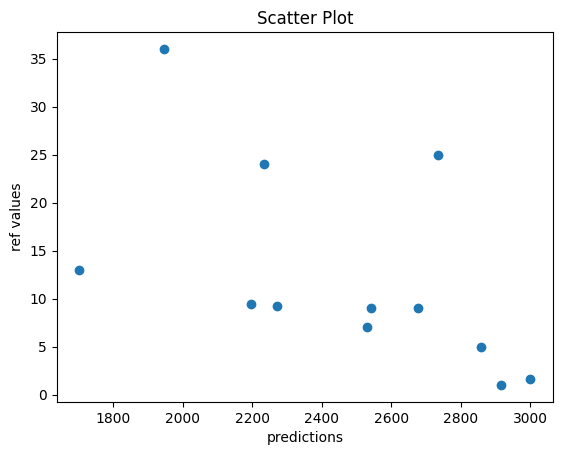

In [ ]:
#plt.scatter(all_df_pred.EVI,resp_var)
plt.scatter(all_df_pred.NIR,resp_var1)
plt.xlabel('predictions')
plt.ylabel('ref values')
plt.title('Scatter Plot')

In [ ]:
all_df_pred

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706


In [ ]:
all_df_pred.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=50)

In [ ]:
resp_df1 = pd.DataFrame(index=all_df_pred.index, data = resp_var1, columns=['resp'])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(all_df_pred, resp_df, test_size=0.5, random_state=42)  # for large sample sizes (ignore here)

X_train = all_df_pred
y_train = resp_df1

rf.fit(X_train, y_train)

# Make prediction
predictions1 = rf.predict(X_train)

<ipython-input-72-e1e152818c32>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
y_train

,resp
site_1,38.0
site_2,24.0
site_3,12.4
site_4,9.0
site_5,13.0
site_6,9.2
site_7,9.0
site_9,52.5
site_10,40.0


In [ ]:
predictions1

array([ 1.908, 25.9  , 20.88 ,  9.272, 18.04 ,  9.056, 11.392, 17.94 ,
        5.676, 12.764, 13.172,  2.14 ])

In [ ]:
all_df_pred

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706


In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
""" evaluate model """

# Mean absolute error (MAE)
mae = mean_absolute_error(y_train.values.ravel(), predictions1)

# Mean squared error (MSE)
mse = mean_squared_error(y_train.values.ravel(), predictions1)

# R-squared scores
r2 = r2_score(y_train.values.ravel(), predictions1)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 3.32
Mean Squared Error: 20.15
R-squared scores: 0.8


<ipython-input-77-4e3b4eefaabc>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


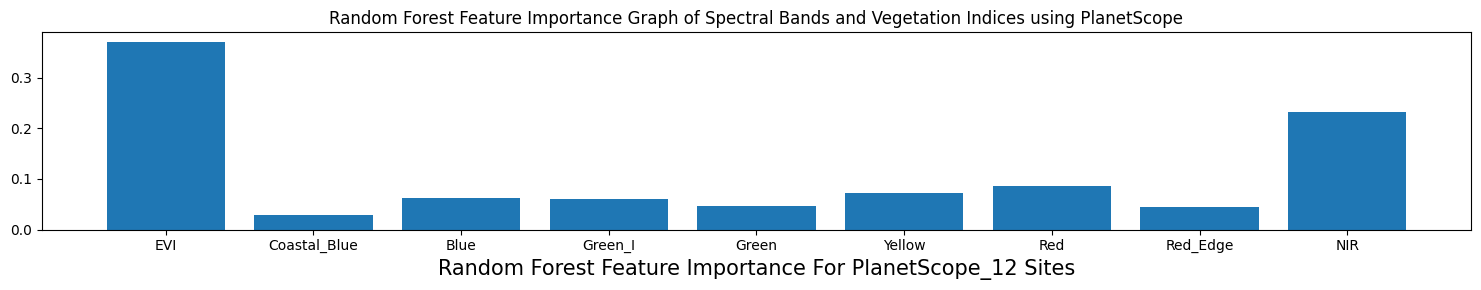

In [ ]:
# Train the model

# X_train = all_df_pred
# y_train = resp_df

rf.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(15, 3))
X_Variables = X_train.columns
plt.bar(X_Variables, rf.feature_importances_, orientation = 'vertical')
plt.xlabel("Random Forest Feature Importance For PlanetScope_12 Sites", fontsize=15)
plt.title('Random Forest Feature Importance Graph of Spectral Bands and Vegetation Indices using PlanetScope')

plt.tight_layout()

In [ ]:
slope, intercept = np.polyfit(predictions1, y_train, 1)

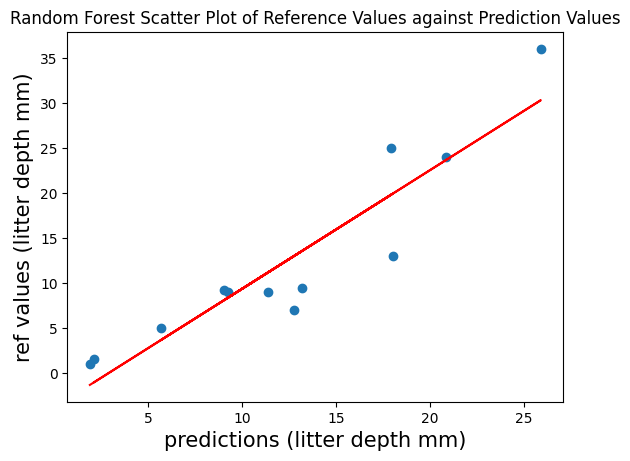

In [ ]:
plt.scatter(predictions1,y_train)
plt.xlabel('predictions (litter depth mm)', fontsize=15)
plt.ylabel('ref values (litter depth mm)', fontsize=15)
plt.title ('Random Forest Scatter Plot of Reference Values against Prediction Values')
plt.plot(predictions1, slope * predictions1 + intercept, color='red')
plt.savefig('Random Forest Scatter Plot PlanetScope 12 Sites.png')

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeavePOut, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming X is your feature data and y is your target data
X, y = 38.0,24.0,12.4


9.0
13.0
9.2
9.0
52.5
40.0

n_splits = len(X) // 2  # K = N/2

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores = []
rf = RandomForestRegressor()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

average_mse = sum(mse_scores) / len(mse_scores)

print(f"Average MSE: {average_mse}")

Leave-Two-Out Cross-Validation Scores: [0.5 0.5 0.  0.5 0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1.  0.5 1.
 1.  0.5 1.  0.  0.5 0.  1.  0.5 1.  1.  0.5 1.  0.5 0.5 0.5 0.  0.5 0.5
 0.5 0.  1.  1.  0.5 1.  1.  0.5 1.  1.  0.5 1.  1.  0.5 1.  0.5 1.  1.
 0.5 1.  0.5 0.5 0.  0.5 1.  1.  1.  0.5 0.5 1. ]
Mean LTO CV Accuracy: 0.6439393939393939


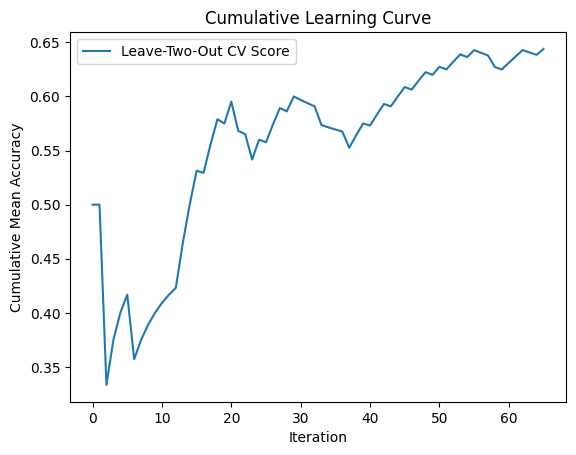

In [ ]:
# Generate a small example dataset
X, y = make_classification(n_samples=12, n_features=5, n_informative=2, n_redundant=2, random_state=42)

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Initialize LeavePOut with P=2
lpo = LeavePOut(p=2)

# Apply Leave-P-Out cross-validation, where P=2
scores = cross_val_score(rf, X, y, cv=lpo)

# Calculate the cumulative mean of the scores up to each point
cumulative_mean_score = np.cumsum(scores) / np.arange(1, len(scores) + 1)

# Plotting the 'learning curve'
plt.plot(cumulative_mean_score, label='Leave-Two-Out CV Score')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean Accuracy')
plt.title('Cumulative Learning Curve')
plt.legend()
plt.show()

In [ ]:
filtered_df

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
21,NaN,NaN,27.498010,153.112394,56s.511099.6958399,2022-09-01,0.270833,"Gina Minatel,Katelyn Gibson",remnant,12.11.14,...,0.0,NaN,7.0,Dense weedy ground cover layer,"Ageratum houstonianum (exotic),Lantana camara ...",100,90.0,13.0,Dense thicket understory dominated by lantana ...,NaN
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:

""" required to convert lat long to local image coord system """
# Define the input coordinate system (WGS 84, which is common for GPS coordinates)
input_crs = pyproj.CRS("EPSG:4326")

# Define the output UTM coordinate system (e.g., UTM Zone 33N with WGS 84 datum)
output_crs = pyproj.CRS("EPSG:32756")  # UTM Zone 33N   # 32756  https://epsg.io/32756  #20356    #7856

# Create a pyproj Transformer for the conversion
transformer = pyproj.Transformer.from_crs(input_crs, output_crs, always_xy=True)

In [ ]:
import pandas as pd


In [ ]:
roi_polygon = geojson.Polygon([[(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]])

In [ ]:
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]
roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})
roi_coordinates

[(516474.7268775898, 6949390.538959475),
 (516524.59835553356, 6949390.538959475),
 (516524.59835553356, 6949410.409986593),
 (516474.7268775898, 6949410.409986593),
 (516474.7268775898, 6949390.538959475)]

In [ ]:
import numpy as np
import pandas as pd
import pyproj

# Define your coordinate transformation
transformer = pyproj.Transformer.from_crs("epsg:4326", "epsg:32756", always_xy=True)  # Replace 'XX' with the appropriate UTM zone for your region

# Iterate through rows of the DataFrame
for row_v in np.arange(0, len(filtered_df), 1):
    lat_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v, :]['Transect Starts (GDA2020)'].split(',')[0]) * -1,
                        pd.to_numeric(filtered_df.iloc[row_v, :]['Transect End (GDA2020)'].split(',')[0]) * -1])
    lon_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v, :]['Transect Starts (GDA2020)'].split(',')[1]),
                        pd.to_numeric(filtered_df.iloc[row_v, :]['Transect End (GDA2020)'].split(',')[1])])

    # Calculate the latitude and longitude range
    lat_range = (min(lat_arr), max(lat_arr))
    lon_range = (min(lon_arr), max(lon_arr))

    try:
        # Convert coordinates to UTM
        utm_easting1, utm_northing1 = transformer.transform(lon_range[0], lat_range[0])
        utm_easting2, utm_northing2 = transformer.transform(lon_range[1], lat_range[1])

        # Add a 50-meter buffer to northing and a 20-meter buffer to easting
        utm_northing1 += 10 # Add 50 meters to the northing
        utm_northing2 += -10
        utm_easting1 += -25  # Add 20 meters to the easting
        utm_easting2 += 25

        print("Modified Coordinates (Easting, Northing):", utm_easting1, utm_northing1, utm_easting2, utm_northing2)

    except Exception as e:
        print(f"Error processing row {row_v}: {e}")

Modified Coordinates (Easting, Northing): 481650.41165052424 6958303.547044568 481747.910502479 6958284.4521333985
Modified Coordinates (Easting, Northing): 479945.2735266781 6957092.97985312 480042.5463529602 6957082.72536024
Modified Coordinates (Easting, Northing): 477850.23820780823 6957012.436374376 477945.2557828211 6956996.365007638
Modified Coordinates (Easting, Northing): 486541.8961541317 6955274.6543417 486626.5787324647 6955261.752207018
Modified Coordinates (Easting, Northing): 486451.93047601095 6955102.187635154 486542.5902722659 6955093.988555941
Modified Coordinates (Easting, Northing): 515044.0633548761 6953806.139940982 515131.2277367453 6953800.147977162
Modified Coordinates (Easting, Northing): 514252.62347991555 6954001.079817203 514331.38253231876 6953995.708359649
Modified Coordinates (Easting, Northing): 514453.74252226634 6954207.854235923 514544.31618988444 6954200.373669136
Modified Coordinates (Easting, Northing): 511046.112379434 6958402.676109256 511142.5

In [ ]:
roi_polygon = geojson.Polygon([[(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]])

In [ ]:
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]
roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})
roi_coordinates

[(511907.56830897694, 6957553.342632536),
 (511988.1318836823, 6957553.342632536),
 (511988.1318836823, 6957582.913869006),
 (511907.56830897694, 6957582.913869006),
 (511907.56830897694, 6957553.342632536)]

In [ ]:
roi_coordinates_list_final1 = [
[(481650.41165052424, 6958303.547044568), (481747.910502479, 6958293.547044568), (481747.910502479, 6958284.4521333985), (481650.41165052424, 6958284.4521333985), (481650.41165052424, 6958303.547044568)], #Site 1
[(479970.2735266781, 6957082.97985312), (480017.5463529602, 6957082.97985312), (480017.5463529602, 6957092.72536024), (479970.2735266781, 6957092.72536024), (479970.2735266781, 6957082.97985312)],            #Site 2
[(477875.23820780823, 6957002.436374376), (477920.2557828211, 6957002.436374376), (477920.2557828211, 6957006.365007638), (477875.23820780823, 6957006.365007638), (477875.23820780823, 6957002.436374376)],    #Site 3
[(486566.8961541317, 6955264.6543417), (486601.5787324647, 6955264.6543417), (486601.5787324647, 6955271.752207018), (486566.8961541317, 6955271.752207018), (486566.8961541317, 6955264.6543417)],             #Site 4
[(486476.93047601095, 6955092.187635154), (486517.5902722659, 6955092.187635154), (486517.5902722659, 6955103.988555941), (486476.93047601095, 6955103.988555941), (486476.93047601095, 6955092.187635154)],     #Site 5
[(515069.0633548761, 6953796.139940982), (515106.2277367453, 6953796.139940982), (515106.2277367453, 6953810.147977162), (515069.0633548761, 6953810.147977162), (515069.0633548761, 6953796.139940982)],       #Site 6
[(514277.62347991555, 6953991.079817203), (514306.38253231876, 6953991.079817203), (514306.38253231876, 6954005.708359649), (514277.62347991555, 6954005.708359649), (514277.62347991555, 6953991.079817203)],  #Site 7
[(514478.74252226634, 6954197.854235923), (514519.31618988444, 6954197.854235923), (514519.31618988444, 6954210.373669136), (514478.74252226634, 6954210.373669136), (514478.74252226634, 6954197.854235923)],  #Site 8
[(511071.112379434, 6958392.676109256), (511117.5529698287, 6958392.676109256), (511117.5529698287, 6958394.534821078), (511071.112379434, 6958394.534821078), (511071.112379434, 6958392.676109256)],          #Site 9
[(514174.3433063846, 6953400.077835709), (514226.9039011191, 6953400.077835709), (514226.9039011191, 6953408.6717124125), (514174.3433063846, 6953408.6717124125), (514174.3433063846, 6953400.077835709)],     #Site 10
[(508274.4268716489, 6968696.382010017), (508323.83610649983, 6968696.382010017), (508323.83610649983, 6968702.247671944), (508274.4268716489, 6968702.247671944), (508274.4268716489, 6968696.382010017)],     #Site 11
[(508713.14944754593, 6969490.493786637), (508723.9265165375, 6969490.493786637), (508723.9265165375, 6969492.4953942625), (508713.14944754593, 6969492.4953942625), (508713.14944754593, 6969490.493786637)],  #Site 12
[(508778.2234123278, 6969295.5947826225), (508827.509343359, 6969295.5947826225), (508827.509343359, 6969304.399496254), (508778.2234123278, 6969304.399496254), (508778.2234123278, 6969295.5947826225)],      #Site 13
[(511932.56830897694, 6957543.342632536), (511963.1318836823, 6957543.342632536), (511963.1318836823, 6957592.913869006), (511932.56830897694, 6957592.913869006), (511932.56830897694, 6957543.342632536)],    #Site 14
]





In [ ]:
im_list = [r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif',
           r'/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif',]

In [ ]:
# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    print(geotiff_path)
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

    # Iterate over different ROI coordinates
    for roi_coordinates in roi_coordinates_list_final1:
        roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

        # Check if the current ROI polygon intersects with the image extent
        roi_within_image = roi_polygon.intersects(im_polygon)

        # Print the result
        if roi_within_image:
            print("study site intersects with the GeoTIFF extent.")
        else:
            print("study site does not intersect with the GeoTIFF extent.")

/content/gdrive/MyDrive/Masters Files/Combined/20220909_232920_44_2438_3B_AnalyticMS_SR_8b_clip.tif
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
/content/gdrive/MyDrive/Masters Files/Combined/20220909_232909_04_222f_3B_AnalyticMS_SR_8b_clip.tif
study site intersects with the GeoTIFF extent.
study site inte

In [ ]:
# Create an empty list to store the spectral band means for each ROI
mu_list_ind2 = []
site_order = []  # Keep track of the site order

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list_final1):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                # Create a masked array by masking the zeros
                masked_data2 = ma.masked_equal(masked_data, 0)

                # Calculate the mean for each band and each ROI
                mean_values = np.mean(masked_data2, axis=(1, 2))

                # Append the mean values for the current ROI to mu_list_ind
                mu_list_ind2.append(mean_values)
                site_order.append(site_num)  # Track the site order
                print(f"array for site {site_num + 1}: {mean_values}")

# Now, you can access the mean values for a specific site using site_order
# For example, to access the mean values for site 1:

array for site 6: [290.6666666666667 304.73333333333335 389.8 448.5 464.9 359.85
 783.3166666666667 2278.0]
array for site 7: [281.0444444444444 303.15555555555557 343.9111111111111 392.1333333333333
 432.84444444444443 391.35555555555555 761.4222222222222
 2507.7555555555555]
array for site 8: [281.86538461538464 275.53846153846155 337.8269230769231 380.8076923076923
 411.59615384615387 333.3076923076923 726.3846153846154 2435.5576923076924]
array for site 10: [ 279.72222222  295.27777778  357.2962963   408.7962963   441.64814815
  348.53703704  762.03703704 2596.33333333]
array for site 1: [191.45283018867926 236.43396226415095 347.8301886792453
 390.87421383647796 356.97484276729557 322.1823899371069 745.440251572327
 2712.635220125786]
array for site 2: [152.125 196.72916666666666 275.5 306.0416666666667 293.5833333333333
 253.58333333333334 602.1666666666666 2187.75]
array for site 3: [235.86666666666667 271.8666666666667 366.6666666666667 412.6666666666667
 423.2 404.2 785.533333

In [ ]:
# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates
        for roi_coordinates in roi_coordinates_list_final1:
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

              #Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)
                    # You can now work with the extracted data in `masked_data`
                    # and the corresponding georeferencing transform in `masked_transform`

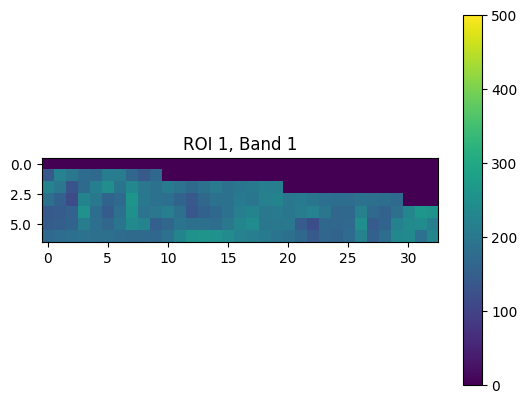

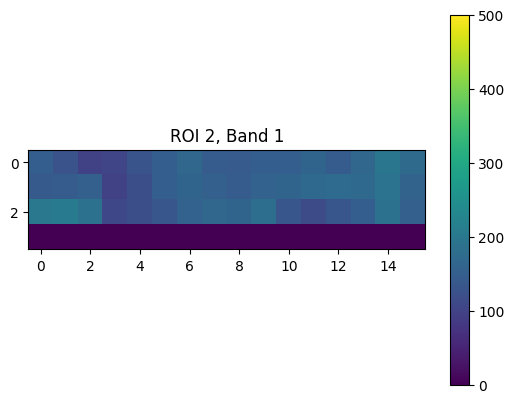

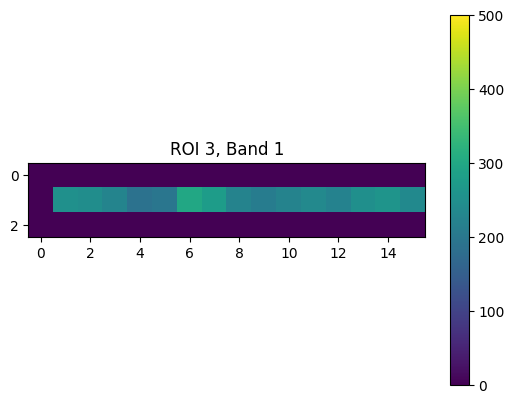

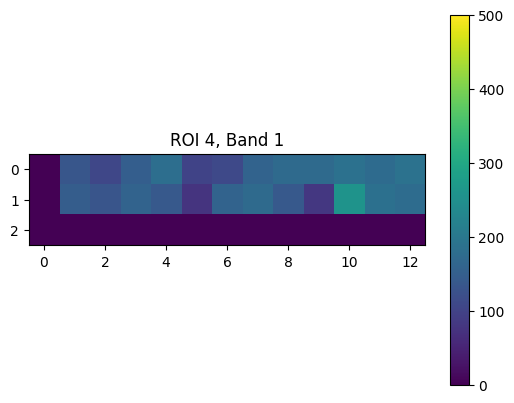

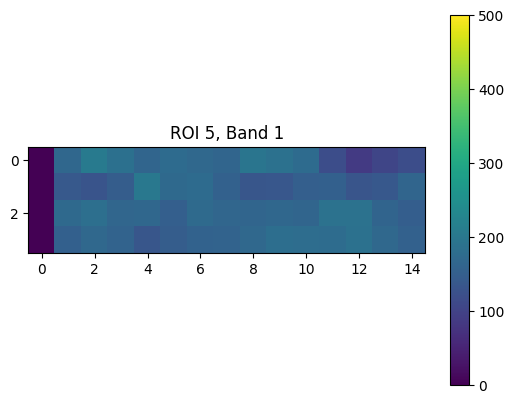

In [ ]:
# Iterate over different ROI coordinates
for site_num, roi_coordinates1 in enumerate(roi_coordinates_list_final1):
    roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates1]})

    # Check if the current ROI polygon intersects with the image extent
    if roi_polygon.intersects(im_polygon):
        # Extract the ROI geometry
        with rasterio.open(geotiff_path) as roi_dataset:
            masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)


        # Plot the first band of masked_data2
        first_band_data_band_data = masked_data[0]
        plt.figure()
        plt.imshow(first_band_data_band_data, vmax=500)
        plt.title(f'ROI {site_num + 1}, Band 1')
        plt.colorbar()
        plt.show()

In [ ]:
# Create a masked array by masking the zeros
masked_data2 = ma.masked_equal(masked_data, 0)

In [ ]:
measurement_list = ["Coastal_Blue", "Blue", "Green_I", "Green",
                    "Yellow", "Red", "Red_Edge", "NIR"]


In [ ]:
Final_New_PS_all_df = pd.DataFrame()
Final_New_PS_all_df = pd.DataFrame(index=measurement_list,data=mu_list_ind2[site_order.index(0)]
                      ,columns=['Site1'])
Final_New_PS_all_df

,Site1
Coastal_Blue,191.452830
Blue,236.433962
Green_I,347.830189
Green,390.874214
Yellow,356.974843
Red,322.182390
Red_Edge,745.440252
NIR,2712.635220


In [ ]:
import pandas as pd

# Assuming you have the following variables defined:
# measurement_list: a list of measurement names
# site_order: a list containing the order of sites (e.g., [1, 2, 3, 4, 5, 6, 7, 9, 10])
# mu_list_ind: a list of lists where each inner list contains mean values for a site

# Create an empty DataFrame with the index
Final_New_PS_all_df = pd.DataFrame(index=measurement_list)

# Define the custom order for columns
custom_order = [f'site_{site_num}' for site_num in [1, 2, 3, 4, 5, 6, 7, 9, 10]]

# Iterate over sites and add columns to the DataFrame if the site number is present
for site_num, site_name in zip([1, 2, 3, 4, 5, 6, 7, 9, 10], custom_order):
    if site_num <= len(mu_list_ind):
        site_mean_values = mu_list_ind[site_num - 1]  # Adjusted to 0-based index
        Final_New_PS_all_df[site_name] = site_mean_values

# Now, 'Final_New_PS_all_df' will contain columns for each site with their respective mean values
# Columns will be ordered as specified in the 'custom_order' list

In [ ]:
Final_New_PS_all_df

,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_9,site_10
Coastal_Blue,289.625000,287.676471,372.529412,500.519608,380.352941,211.731092,156.223214,154.750000,253.117647
Blue,302.330357,297.941176,416.941176,560.627451,474.008403,246.403361,203.812500,189.958333,338.764706
Green_I,383.428571,350.313725,506.509804,682.009804,673.731092,350.613445,282.133929,244.270833,476.000000
Green,442.991071,395.539216,578.568627,792.960784,780.008403,398.134454,318.330357,270.541667,537.546218
Yellow,460.785714,440.754902,636.421569,919.441176,792.915966,400.764706,302.937500,271.197917,530.638655
Red,358.535714,393.313725,598.598039,905.490196,807.075630,379.714286,266.151786,242.052083,529.042017
Red_Edge,779.526786,764.323529,1017.127451,1382.794118,1262.747899,687.806723,616.821429,504.020833,1055.974790
NIR,2272.830357,2541.617647,2736.117647,3000.627451,2915.613445,1946.109244,2234.401786,1703.239583,2858.705882


In [ ]:
import numpy as np
import rasterio
import rasterio.mask
from shapely.geometry import shape
import numpy.ma as ma

In [ ]:
def calculate_evi(red, nir, blue):

    # Constants for EVI calculation

    L = 1.0

    C1 = 6.0

    C2 = 7.5

    G = 2.5

    # Calculate EVI

    evi = G * ((nir/10000 - red/10000) / (nir/10000 + C1 * red/10000 - C2 * blue/10000 + L))



    return evi


In [ ]:
# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list_final1):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = rasterio.mask.mask(roi_dataset, [roi_polygon], crop=True)

                # Create masked arrays by masking the zeros for each band
                red_band = ma.masked_equal(masked_data[4], 0)  # Red Spectral Band for PlanetScope is Band 5
                nir_band = ma.masked_equal(masked_data[7], 0)  # NIR Spectral Band for PlanetScope is Band 8
                blue_band = ma.masked_equal(masked_data[1], 0) # Blue Spectral Band for PlanetScope is Band 2

                # Calculate EVI for the current ROI
                evi = calculate_evi(red_band, nir_band, blue_band)

                # Print or save the EVI values for the current ROI
                print(f"EVI values for ROI {site_num + 1}: {evi}")

EVI values for ROI 6: [[-- 0.34740298746545994 0.3366691619715535 0.34261241970021417
  0.357838654526659 0.3633834822128193 0.35588415568495246
  0.3628738845697216 0.3604214277414106 0.3344330544754723
  0.30852392475216617 0.3119047619047619 0.3307227204479974 --]
 [-- 0.35355355355355345 0.3642871346192086 0.34049405019047246
  0.36138164898860453 0.37562637018477923 0.35062713797035344
  0.3551120100751822 0.36593772739458463 0.3612416236617114
  0.348582171392762 0.33437561070940003 0.3350739773716275 --]
 [-- 0.3619318856057908 0.36558669001751315 0.34243614931237726
  0.3675132526307461 0.3812580733549928 0.3556549325383174
  0.3291060452812573 0.3403333720075801 0.35396354387452306
  0.35267839648889066 0.332795016726266 0.3180632289748312 --]
 [-- 0.3771885159218205 0.3743021152787607 0.36297029702970296
  0.3643060170543256 0.3475449194547708 0.3404650809908577
  0.3520518358531317 0.3461909353905496 0.3454074532240606
  0.33385733935940254 0.3346584455622262 0.3290705549579

In [ ]:
# Create an empty list to store EVI values per ROI
roi_evi_values_final = []

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list_final1):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = rasterio.mask.mask(roi_dataset, [roi_polygon], crop=True)

                # Create masked arrays by masking the zeros for each band
                red_band = ma.masked_equal(masked_data[4], 0)  # Red Spectral Band for PlanetScope is Band 5
                nir_band = ma.masked_equal(masked_data[7], 0)  # NIR Spectral Band for PlanetScope is Band 8
                blue_band = ma.masked_equal(masked_data[1], 0) # Blue Spectral Band for PlanetScope is Band 2

                # Calculate EVI for the current ROI
                evi = calculate_evi(red_band, nir_band, blue_band)

                # Append the EVI values for the current ROI to the list
                roi_evi_values_final.append(evi)

# Calculate the mean EVI values for each ROI
mean_evi_per_roi = [np.mean(evi_values) for evi_values in roi_evi_values_final]

# Print or save the mean EVI values for each ROI
for site_num, mean_evi in enumerate(mean_evi_per_roi):
    print(f"Mean EVI for Site {site_num + 1}: {mean_evi}")

Mean EVI for Site 1: 0.3545882479567505
Mean EVI for Site 2: 0.40422875400929387
Mean EVI for Site 3: 0.3937680075467569
Mean EVI for Site 4: 0.41313740864936954
Mean EVI for Site 5: 0.4497932321716504
Mean EVI for Site 6: 0.37933318061107274
Mean EVI for Site 7: 0.38845198083098753
Mean EVI for Site 8: 0.4326388793783267
Mean EVI for Site 9: 0.2975760993530831


In [ ]:
# Create a new row with 'EVI' as the index and mean EVI values as the data
evi_row = pd.Series(mean_evi_per_roi, index=Final_New_PS_all_df.columns, name='EVI')


# Append the new row to the DataFrame
Final_New_PS_all_df = Final_New_PS_all_df.append(evi_row)


Final_New_PS_all_df

<ipython-input-105-94ec7b51e624>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_New_PS_all_df = Final_New_PS_all_df.append(evi_row)


,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_9,site_10
Coastal_Blue,289.625000,287.676471,372.529412,500.519608,380.352941,211.731092,156.223214,154.750000,253.117647
Blue,302.330357,297.941176,416.941176,560.627451,474.008403,246.403361,203.812500,189.958333,338.764706
Green_I,383.428571,350.313725,506.509804,682.009804,673.731092,350.613445,282.133929,244.270833,476.000000
Green,442.991071,395.539216,578.568627,792.960784,780.008403,398.134454,318.330357,270.541667,537.546218
Yellow,460.785714,440.754902,636.421569,919.441176,792.915966,400.764706,302.937500,271.197917,530.638655
Red,358.535714,393.313725,598.598039,905.490196,807.075630,379.714286,266.151786,242.052083,529.042017
Red_Edge,779.526786,764.323529,1017.127451,1382.794118,1262.747899,687.806723,616.821429,504.020833,1055.974790
NIR,2272.830357,2541.617647,2736.117647,3000.627451,2915.613445,1946.109244,2234.401786,1703.239583,2858.705882
EVI,0.354588,0.404229,0.393768,0.413137,0.449793,0.379333,0.388452,0.432639,0.297576


In [ ]:
# Get the last row as a separate DataFrame
last_row = Final_New_PS_all_df.loc['EVI']

# Drop the last row from the original DataFrame
Final_New_PS_all_df = Final_New_PS_all_df.drop('EVI')

In [ ]:
# Insert the last row at the beginning of the DataFrame
Final_New_PS_all_df = pd.concat([pd.DataFrame([last_row]), Final_New_PS_all_df], axis=0)

In [ ]:
Final_New_PS_all_df

,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_9,site_10
EVI,0.354588,0.404229,0.393768,0.413137,0.449793,0.379333,0.388452,0.432639,0.297576
Coastal_Blue,289.625000,287.676471,372.529412,500.519608,380.352941,211.731092,156.223214,154.750000,253.117647
Blue,302.330357,297.941176,416.941176,560.627451,474.008403,246.403361,203.812500,189.958333,338.764706
Green_I,383.428571,350.313725,506.509804,682.009804,673.731092,350.613445,282.133929,244.270833,476.000000
Green,442.991071,395.539216,578.568627,792.960784,780.008403,398.134454,318.330357,270.541667,537.546218
Yellow,460.785714,440.754902,636.421569,919.441176,792.915966,400.764706,302.937500,271.197917,530.638655
Red,358.535714,393.313725,598.598039,905.490196,807.075630,379.714286,266.151786,242.052083,529.042017
Red_Edge,779.526786,764.323529,1017.127451,1382.794118,1262.747899,687.806723,616.821429,504.020833,1055.974790
NIR,2272.830357,2541.617647,2736.117647,3000.627451,2915.613445,1946.109244,2234.401786,1703.239583,2858.705882


In [ ]:
Final_New_PS_all_df = Final_New_PS_all_df.T

Final_New_PS_all_df

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
site_1,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
site_2,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
site_3,0.393768,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
site_4,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451
site_5,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
site_6,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
site_7,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
site_9,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
site_10,0.297576,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882


In [ ]:
""" export df """
Final_New_PS_all_df.to_csv('Final_P.SD_all_new_sites.csv')

# Load Excel Data and Re-run Random Forest Regression Analysis for new field sites

In [ ]:
""" load reference data """
ref_df_new = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet2')

In [ ]:
""" load reference data """
ref_df2_new = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet1')

In [ ]:
ref_df_new

,Site #,Dataset (DS) Index for Python,Latitude (GDA2020),Longitude (GDA2020),Date,Remnant Status,Desktop RE,Groundtruthed RE,VHC,Vegetation Condition Class,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
0,1,0,27.494158,152.740813,2022-09-07,nonremnant (cleared),Nonremnant,Nonremnant,39.b,7,...,NaN,NaN,0,"Dominated by managed non native grass, cleared...",Poaceae Unknown,100.0,100.0,1.0,"Dominated by managed non native grass, cleared...",NaN
1,2,1,27.499615,152.738818,2022-09-07,regrowth,12.11.6,Regrowth 12.11.6,10.2,3,...,0.0,NaN,11,Dominated by exotic species such as Melinis re...,"Ageratum houstonianum (exotic),Bidens pilosa (...",100.0,99.0,36.0,Regrowth on the edge of a cleared patch and un...,NaN
2,3,2,27.509657,152.797552,2022-09-07,remnant,12.11.3a,12.11.3a,9.2,1,...,0.0,NaN,14,Dominated by lantana montevensis with billy go...,NaN,99.0,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
3,4,3,27.526253,152.864255,2022-08-31,remnant,12.11.5,12.11.5,10.1,1,...,0.0,NaN,10,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9.0,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
4,5,4,27.527787,152.863334,2022-08-31,remnant,12.11.3,12.11.5,10.1,1,...,0.0,NaN,23,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8.0,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
5,6,5,27.539485,153.152898,2022-08-30,remnant,12.910.22,12.910.22,22.5,1,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
6,7,6,27.537714,153.144733,2022-08-30,remnant,12.910.4,12.910.4,9.2,2,...,0.0,NaN,14,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21.0,56.0,9.0,NaN,Platylobium formosum
7,8,7,27.529508,153.144817,2022-08-30,nonremnant (cleared),Nonremnant,Nonremnant,39.a,3,...,0.0,NaN,4,NaN,"Eragrostis sp.,Festuca sp.,Gahnia sp.,Lomandra...",21.4,19.0,25.0,Transect is upslope,Entolasia stricta
8,9,8,27.556653,152.854160,2022-08-31,nonremnant (cleared),Non remnant,Non remnant,39.a,6,...,0.0,NaN,0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex...",3.4,58.0,5.0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex..."
9,10,9,27.554833,152.851117,2022-08-31,regrowth,12.3.3,Rehabilitated 12.3.7/12.3.3,16.1,4,...,0.0,NaN,9,NaN,"Cardiospermum grandiflorum (exotic),Commelina ...",13.0,77.0,7.0,NaN,"Asparagus africanus (exotic),Lantana camara (e..."


In [ ]:
ref_df2_new = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet1')


In [ ]:
filtered_df = ref_df2_new[(ref_df2_new['Remnant Status'] == 'remnant') & (ref_df2_new['EDL'] != 'Water')]   # filter the df for an auto loop

filtered_df

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
21,NaN,NaN,27.498010,153.112394,56s.511099.6958399,2022-09-01,0.270833,"Gina Minatel,Katelyn Gibson",remnant,12.11.14,...,0.0,NaN,7.0,Dense weedy ground cover layer,"Ageratum houstonianum (exotic),Lantana camara ...",100,90.0,13.0,Dense thicket understory dominated by lantana ...,NaN
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
rows_to_remove = [21, 25, 28, 29, 32]

filtered_df2 = filtered_df.drop(rows_to_remove)

In [ ]:
filtered_df2

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
""" specify reponse variable """
resp_var = pd.to_numeric(filtered_df2["Litter Depth Average (mm)"].values)

In [ ]:
resp_var

array([38. , 24. , 12.4,  9. , 13. ,  9.2,  9. , 52.5, 40. ])

In [ ]:
all_df_pred_final = Final_New_PS_all_df

In [ ]:
all_df_pred_final

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
site_1,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
site_2,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
site_3,0.393768,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
site_4,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451
site_5,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
site_6,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
site_7,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
site_9,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
site_10,0.297576,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882


Text(0, 0.5, 'ref values')

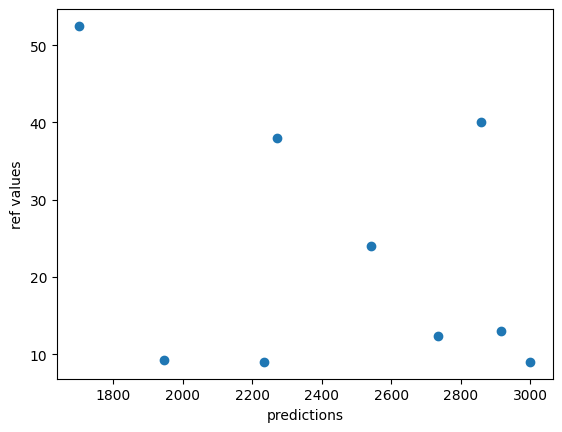

In [ ]:
#plt.scatter(all_df_pred.EVI,resp_var)
plt.scatter(all_df_pred_final.NIR,resp_var)
plt.xlabel('predictions')
plt.ylabel('ref values')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
all_df_pred_final.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
dtype: object

In [ ]:
# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=50)


resp_df = pd.DataFrame(index=all_df_pred_final.index, data = resp_var, columns=['resp'])


In [ ]:
resp_df

,resp
site_1,38.0
site_2,24.0
site_3,12.4
site_4,9.0
site_5,13.0
site_6,9.2
site_7,9.0
site_9,52.5
site_10,40.0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(all_df_pred, resp_df, test_size=0.5, random_state=42)  # for large sample sizes (ignore here)

X_train = all_df_pred_final
y_train = resp_df

rf.fit(X_train, y_train)

# Make prediction
predictions = rf.predict(X_train)

predictions

<ipython-input-127-fcdd4abcf7cb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


array([32.524, 21.456, 14.78 , 12.964, 15.802, 14.074, 17.154, 37.994,
       34.872])

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
""" evaluate model """

# Mean absolute error (MAE)
mae2 = mean_absolute_error(y_train.values.ravel(), predictions)

# Mean squared error (MSE)
mse2 = mean_squared_error(y_train.values.ravel(), predictions)

# R-squared scores
r2_2 = r2_score(y_train.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae2, 2))
print('Mean Squared Error:', round(mse2, 2))
print('R-squared scores:', round(r2_2, 2))

Mean Absolute Error: 5.54
Mean Squared Error: 43.63
R-squared scores: 0.82


<ipython-input-130-6b8506f12827>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


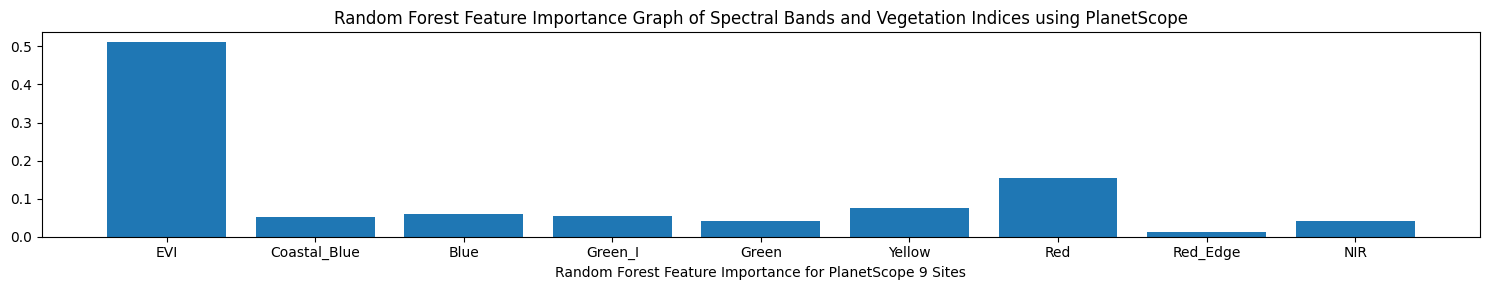

In [ ]:
# Train the model

# X_train = all_df_pred
# y_train = resp_df

rf.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(15, 3))
X_Variables = X_train.columns
plt.bar(X_Variables, rf.feature_importances_, orientation = 'vertical')
plt.xlabel("Random Forest Feature Importance for PlanetScope 9 Sites")
plt.title('Random Forest Feature Importance Graph of Spectral Bands and Vegetation Indices using PlanetScope')

plt.tight_layout()

In [ ]:
slope, intercept = np.polyfit(predictions, y_train, 1)

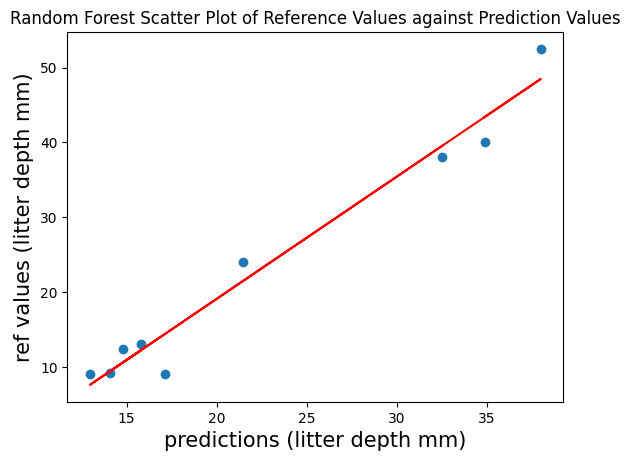

In [ ]:
plt.scatter(predictions,y_train)
plt.xlabel('predictions (litter depth mm)', fontsize=15)
plt.ylabel('ref values (litter depth mm)', fontsize=15)
plt.title('Random Forest Scatter Plot of Reference Values against Prediction Values')
plt.plot(predictions, slope * predictions + intercept, color='red')
plt.savefig('Random Forest Scatter Plot PlanetScope 9 Sites')

#Old Code

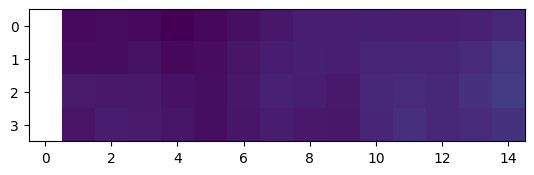

In [ ]:
# image quickplot of band 1
# confirmed data for all three images is good (i.e. only zeroes outside of the image boundary)
plt.imshow(masked_data2[-1,:,:],vmax=5000)

In [ ]:
np.shape(masked_data)  # check my dimensions (band, X, Y) - makes sense, a small ROI with 8 bands

(8, 4, 15)

In [ ]:
# Set the buffer to load around the coordinates representing start and end transect, 50m by 20m.
buffer_lat = 0.000180
buffer_lon = 0.000505

""" extract the min and max lat/lon from the df """
lat_range = (central_lat - buffer_lat/2, central_lat + buffer_lat/2)
lon_range = (central_lon - buffer_lon/2, central_lon + buffer_lon/2)



for row_v in np.arange(0,len(filtered_df),1):
    lat_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v,:]['Transect Starts (GDA2020)'].split(',')[0])*-1,
                 pd.to_numeric(filtered_df.iloc[row_v,:]['Transect End (GDA2020)'].split(',')[0])*-1])
    lon_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v,:]['Transect Starts (GDA2020)'].split(',')[1]),
                 pd.to_numeric(filtered_df.iloc[row_v,:]['Transect End (GDA2020)'].split(',')[1])])

    lat_range = (min(lat_arr), max(lat_arr))
    lon_range = (min(lon_arr), max(lon_arr))

        # Convert coordinates
    # Convert latitude and longitude to eastings and northings
    utm_easting1, utm_northing1 = transformer.transform(lon_arr[0], lat_arr[0])
    utm_easting2, utm_northing2 = transformer.transform(lon_arr[1], lat_arr[1])

    print(lat_arr,lon_arr)

    print([utm_easting1,utm_northing1], [utm_easting2,utm_northing2])

[-27.49887998 -27.49887245] [152.81495999 152.8144791 ]
[481722.91174637974, 6958293.617968416] [481675.41040339076, 6958294.381209564]
[-27.50978476 -27.50969748] [152.79767487 152.79719607]
[480017.5621227472, 6957083.057076189] [479970.2577195713, 6957092.648137335]
[-27.51047936 -27.51044462] [152.77643806 152.77598218]
[477920.2627171246, 6957002.517606382] [477875.2312593642, 6957006.2837757]
[-27.52628176 -27.52621802] [152.86431876 152.86396746]
[486601.58645893424, 6955264.692356791] [486566.88840765716, 6955271.714191985]
[-27.52783787 -27.52773174] [152.86346636 152.86305448]
[486517.60321987263, 6955092.232497979] [486476.9174893445, 6955103.943693233]
[-27.53952213 -27.53939525] [153.15299384 153.15261762]
[515106.2103856419, 6953796.094134942] [515069.0806633119, 6953810.193783061]
[-27.53777081 -27.53763844] [153.14489082 153.14459973]
[514306.3653899869, 6953991.046247039] [514277.6405878077, 6954005.741929704]
[-27.53590194 -27.53578848] [153.14704489 153.14663413]
[51

In [ ]:
roi_coordinates_list2 = [
[(481722.91174637974, 6958293.617968416),(481675.41040339076, 6958293.617968416), (481675.41040339076, 6958294.381209564), (481722.91174637974, 6958294.381209564), (481722.91174637974, 6958293.617968416)],  #site 1
[(480017.5621227472, 6957083.057076189), (479970.2577195713, 6957083.057076189), (479970.2577195713, 6957092.648137335), (480017.5621227472, 6957092.648137335), (480017.5621227472, 6957083.057076189)],  #site 2
[(477920.2627171246, 6957002.517606382), (477875.2312593642, 6957002.517606382), (477875.2312593642, 6957006.2837757), (477920.2627171246, 6957006.2837757), (477920.2627171246, 6957002.517606382)],  #site 3
[(486601.58645893424, 6955264.692356791), (486566.88840765716, 6955264.692356791), (486566.88840765716, 6955271.714191985), (486601.58645893424, 6955271.714191985), (486601.58645893424, 6955264.692356791)],  #site 4
[(486517.60321987263, 6955092.232497979), (486476.9174893445, 6955092.232497979), (486476.9174893445, 6955103.943693233), (486517.60321987263, 6955103.943693233), (486517.60321987263, 6955092.232497979)],  #site 5
[(515106.2103856419, 6953796.094134942), (515069.0806633119, 6953796.094134942), (515069.0806633119, 6953810.193783061), (515106.2103856419, 6953810.193783061), (515106.2103856419, 6953796.094134942)],  #site 6
[(514306.3653899869, 6953991.046247039), (514277.6405878077, 6953991.046247039), (514277.6405878077, 6954005.741929704), (514306.3653899869, 6954005.741929704), (514306.3653899869, 6953991.046247039)],  #site 7
[(514519.3012789843, 6954197.806181448), (514478.7573915135, 6954197.806181448), (514478.7573915135, 6954210.421723478), (514519.3012789843, 6954210.421723478), (514519.3012789843, 6954197.806181448)],  #site 8
[(511117.5512458022, 6958392.634075927), (511071.1140962591, 6958392.634075927), (511071.1140962591, 6958394.57685439), (511117.5512458022, 6958394.57685439), (511117.5512458022, 6958392.634075927)],  #site 9
[(514226.89383611537, 6953400.016835981), (514174.3533342104, 6953400.016835981), (514174.3533342104, 6953408.732712025), (514226.89383611537, 6953408.732712025), (514226.89383611537, 6953400.016835981)],  #site 10
[(508323.83211634704, 6968696.348690769), (508274.4308381185, 6968696.348690769), (508274.4308381185, 6968702.280991147), (508323.83211634704, 6968702.280991147), (508323.83211634704, 6968696.348690769)],  #site 11
[(508723.9250925694, 6969490.486154544), (508713.1508697552, 6969490.486154544), (508713.1508697552, 6969492.503026351), (508723.9250925694, 6969492.503026351), (508723.9250925694, 6969490.486154544)],  #site 12
[(508827.50300354126, 6969295.5595390145), (508778.22971675335, 6969295.5595390145), (508778.22971675335, 6969304.434739793), (508827.50300354126, 6969304.434739793), (508827.50300354126, 6969295.5595390145)],  #site 13
[(511963.0834571995, 6957543.312877734), (511932.61661193403, 6957543.312877734), (511932.61661193403, 6957592.943623481), (511963.0834571995, 6957592.943623481), (511963.0834571995, 6957543.312877734)],  #site 14

]

In [ ]:
roi_coordinates1 = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]

Sandpit